# Hand Written Digit Recognition using Decision Tree Classifier
---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [2]:
# Reading Dataset
training_images_filepath = r'dataset\train-images.idx3-ubyte'
training_labels_filepath = r'dataset\train-labels.idx1-ubyte'
testing_images_filepath = r'dataset\t10k-images.idx3-ubyte'
testing_labels_filepath = r'dataset\t10k-labels.idx1-ubyte'

# Converting to Traning & Test Data
x_train, y_train = loadlocal_mnist(training_images_filepath, training_labels_filepath)
x_test, y_test = loadlocal_mnist(testing_images_filepath, testing_labels_filepath)

# Dimesity of Traning & Testing Data
print('Dimension of training images:', np.shape(x_train))
print('Dimension of trainig labels:',np.shape(y_train))
print('Dimension of testing images:', np.shape(x_test))
print('Dimension of testing labels:',np.shape(y_test))

Dimension of training images: (60000, 784)
Dimension of trainig labels: (60000,)
Dimension of testing images: (10000, 784)
Dimension of testing labels: (10000,)


In [3]:
# Creating Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [4]:
# Prediction using Decision Tree Classifier
prediction = classifier.predict(x_test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [5]:
# Generating Confusion Matrix using Prediction value
c_matrix = confusion_matrix(y_test, y_pred=prediction)
c_matrix

array([[ 906,    0,   11,    8,    6,   12,   14,    4,   12,    7],
       [   2, 1087,   10,    5,    2,    5,    7,    4,   12,    1],
       [  18,    6,  886,   28,   13,   12,   12,   26,   22,    9],
       [  11,    8,   32,  860,    4,   43,    3,   10,   23,   16],
       [   6,    4,    9,    9,  857,   12,   20,    9,   20,   36],
       [  15,   11,    8,   44,    9,  741,   19,    5,   22,   18],
       [  15,    4,   14,   13,   17,   21,  843,    1,   25,    5],
       [   2,   13,   23,   16,    7,    5,    6,  927,    6,   23],
       [  15,    5,   28,   41,   19,   28,   18,   10,  783,   27],
       [  15,    5,    6,   19,   41,   14,    4,   16,   23,  866]],
      dtype=int64)

Text(69.0, 0.5, 'Actual Value')

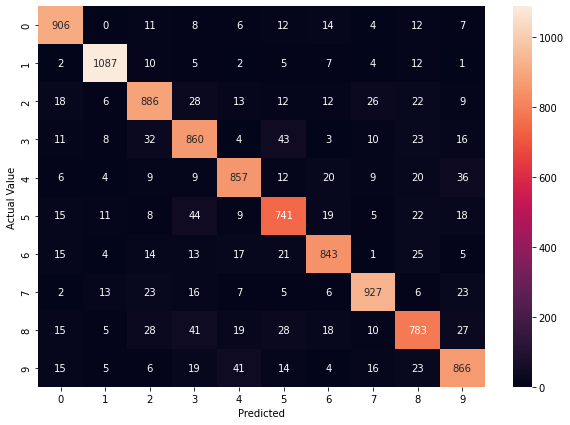

In [6]:
# Generation Heatmap of Confusion Matrix
plt.figure(figsize=(10, 7))
sn.heatmap(c_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual Value')

In [7]:
# Accuracy of Model
print(f'Accuracy: {classifier.score(x_test, y_test)}')

Accuracy: 0.8756


---